<a href="https://colab.research.google.com/github/uptrain-ai/uptrain/blob/main/examples/checks/response_quality/conciseness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center">
  <a href="https://uptrain.ai">
    <img width="300" src="https://user-images.githubusercontent.com/108270398/214240695-4f958b76-c993-4ddd-8de6-8668f4d0da84.png" alt="uptrain">
  </a>
</h1>

<h1 style="text-align: center;">Evaluating Response Conciseness</h1>

**What is Response Conciseness?**: Response conciseness refers to the quality of a generated response in terms of being clear, brief, and to the point. A concise response effectively conveys the necessary information without unnecessary elaboration or verbosity. It focuses on addressing the core of the question or query in a straightforward manner.

In the context of natural language processing and AI-generated responses, concise answers are valuable as they enhance user experience by delivering information efficiently. Extraneous details or overly complex explanations can lead to decreased clarity and user understanding.

For example, if the question is "What are the advantages of adopting cloud computing?", a concise response would highlight key benefits without unnecessary details. An example concise response could be: "Cloud computing offers scalability, cost efficiency, and accessibility to resources over the internet."

**Data schema**: The data schema required for evaluating response conciseness would include the same columns as mentioned in the Response Relevance example:

| Column Name | Description |
| ----------- | ----------- |
| question | The question asked by the user |
| response | The response generated by the model |

 If you face any difficulties, need some help with using UpTrain or want to brainstorm on custom evaluations for your use-case, [speak to the maintainers of UpTrain here](https://calendly.com/uptrain-sourabh/30min).

## Step 1: Install UpTrain by running 'pip install uptrain'

In [1]:
#!pip install uptrain

## Step 2: Let's define our dataset to run evaluations upon

In [2]:
good_data = [
    {
        "question": "What are the primary components of a cell?",
        "response": "A cell comprises a cell membrane, cytoplasm, and nucleus. The cell membrane regulates substance passage, the cytoplasm contains organelles, and the nucleus houses genetic material."
    },
    {
        "question": "How does photosynthesis work?",
        "response": "Photosynthesis converts light energy into chemical energy in plants, algae, and some bacteria. Chlorophyll absorbs sunlight, synthesizing glucose from carbon dioxide and water, with oxygen released as a byproduct."
    },
    {
        "question": "What are the key features of the Python programming language?",
        "response": "Python is a high-level, interpreted language known for readability. It supports object-oriented, imperative, and functional programming with a large standard library, dynamic typing, and automatic memory management."
    }
]

bad_data = [
    {
        "question": "What are the primary components of a cell?",
        "response": "The primary components of a cell are crucial for its function. Speaking of components, the integration of software components in modern applications is a key challenge for developers. It requires careful consideration of architectural patterns and design principles."
    },
    {
        "question": "How does photosynthesis work?",
        "response": "Photosynthesis is a fascinating process in biology. By the way, the implementation of photosynthesis algorithms in computer science for optimizing energy consumption in algorithms is an intriguing area of research. It involves mathematical modeling and algorithmic efficiency."
    },
    {
        "question": "What are the key features of the Python programming language?",
        "response": "Python, as a programming language, is known for its simplicity and readability. Speaking of readability, the importance of clear and concise technical documentation in software development cannot be overstated. It enhances collaboration among team members and ensures the maintainability of codebases over time."
    }
]

data = good_data + bad_data

## Step 3: Running evaluations using UpTrain's Open-Source Software (OSS)

In [3]:
from uptrain import EvalLLM, Evals
import json

OPENAI_API_KEY = "sk-*****************"  # Insert your OpenAI key here

eval_llm = EvalLLM(openai_api_key=OPENAI_API_KEY)

res = eval_llm.evaluate(
    data = data,
    checks = [Evals.RESPONSE_CONCISENESS]
)

2024-02-01 11:12:33.999 | INFO     | uptrain.framework.evalllm:evaluate:104 - Sending evaluation request for rows 0 to <50 to the Uptrain


In [4]:
print(json.dumps(res,indent=3))

[
   {
      "question": "What are the primary components of a cell?",
      "response": "A cell comprises a cell membrane, cytoplasm, and nucleus. The cell membrane regulates substance passage, the cytoplasm contains organelles, and the nucleus houses genetic material.",
      "score_response_conciseness": 1.0,
      "explanation_response_conciseness": " \"The LLM response contains no additional irrelevant information because it directly addresses the user query by listing the primary components of a cell, including the cell membrane, cytoplasm, and nucleus. The response does not include any unnecessary details or explanations, sticking to the essential information needed to answer the user query. Therefore, the response contains no additional irrelevant information.\"\n"
   },
   {
      "question": "How does photosynthesis work?",
      "response": "Photosynthesis converts light energy into chemical energy in plants, algae, and some bacteria. Chlorophyll absorbs sunlight, synthesizi

## Step 4: Let's look at some of the results 

### Sample where responses are concise

In [5]:
print(json.dumps(res[0],indent=3))

{
   "question": "What are the primary components of a cell?",
   "response": "A cell comprises a cell membrane, cytoplasm, and nucleus. The cell membrane regulates substance passage, the cytoplasm contains organelles, and the nucleus houses genetic material.",
   "score_response_conciseness": 1.0,
   "explanation_response_conciseness": " \"The LLM response contains no additional irrelevant information because it directly addresses the user query by listing the primary components of a cell, including the cell membrane, cytoplasm, and nucleus. The response does not include any unnecessary details or explanations, sticking to the essential information needed to answer the user query. Therefore, the response contains no additional irrelevant information.\"\n"
}


### Sample where responses are not concise

In [6]:
print(json.dumps(res[3],indent=3))

{
   "question": "What are the primary components of a cell?",
   "response": "The primary components of a cell are crucial for its function. Speaking of components, the integration of software components in modern applications is a key challenge for developers. It requires careful consideration of architectural patterns and design principles.",
   "score_response_conciseness": 0.0,
   "explanation_response_conciseness": " \"The LLM response contains a lot of additional irrelevant information because it completely deviates from the user query about the primary components of a cell. Instead of providing relevant information about cell components, the response talks about software integration, architectural patterns, and design principles, which are not related to the user query at all. This additional information is not needed to answer the user's question and therefore can be considered as irrelevant.\"\n"
}


## [Optional] Step 5: UpTrain Managed Service and Dashboards

In [7]:
from uptrain import APIClient, Evals
import json

UPTRAIN_API_KEY = "up-*****************"  # Insert your UpTrain key here

uptrain_client = APIClient(uptrain_api_key=UPTRAIN_API_KEY)

res = uptrain_client.log_and_evaluate(
    "Sample-conciseness-evals",
    data = data,
    checks = [Evals.RESPONSE_CONCISENESS]
)

2024-02-01 11:12:50.888 | INFO     | uptrain.framework.remote:log_and_evaluate:511 - Sending evaluation request for rows 0 to <50 to the Uptrain server


In [8]:
print(json.dumps(res, indent=3))

[
   {
      "question": "What are the primary components of a cell?",
      "response": "A cell comprises a cell membrane, cytoplasm, and nucleus. The cell membrane regulates substance passage, the cytoplasm contains organelles, and the nucleus houses genetic material.",
      "score_response_conciseness": 1.0,
      "explanation_response_conciseness": " \"The LLM response contains no additional irrelevant information because it directly addresses the user's query about the primary components of a cell by listing the cell membrane, cytoplasm, and nucleus. The response does not include any unnecessary details or explanations, sticking to the essential information needed to answer the user's question. Therefore, the response contains no additional irrelevant information.\"\n"
   },
   {
      "question": "How does photosynthesis work?",
      "response": "Photosynthesis converts light energy into chemical energy in plants, algae, and some bacteria. Chlorophyll absorbs sunlight, synthesi

### Dashboards: 
Histogram of score vs number of cases with that score

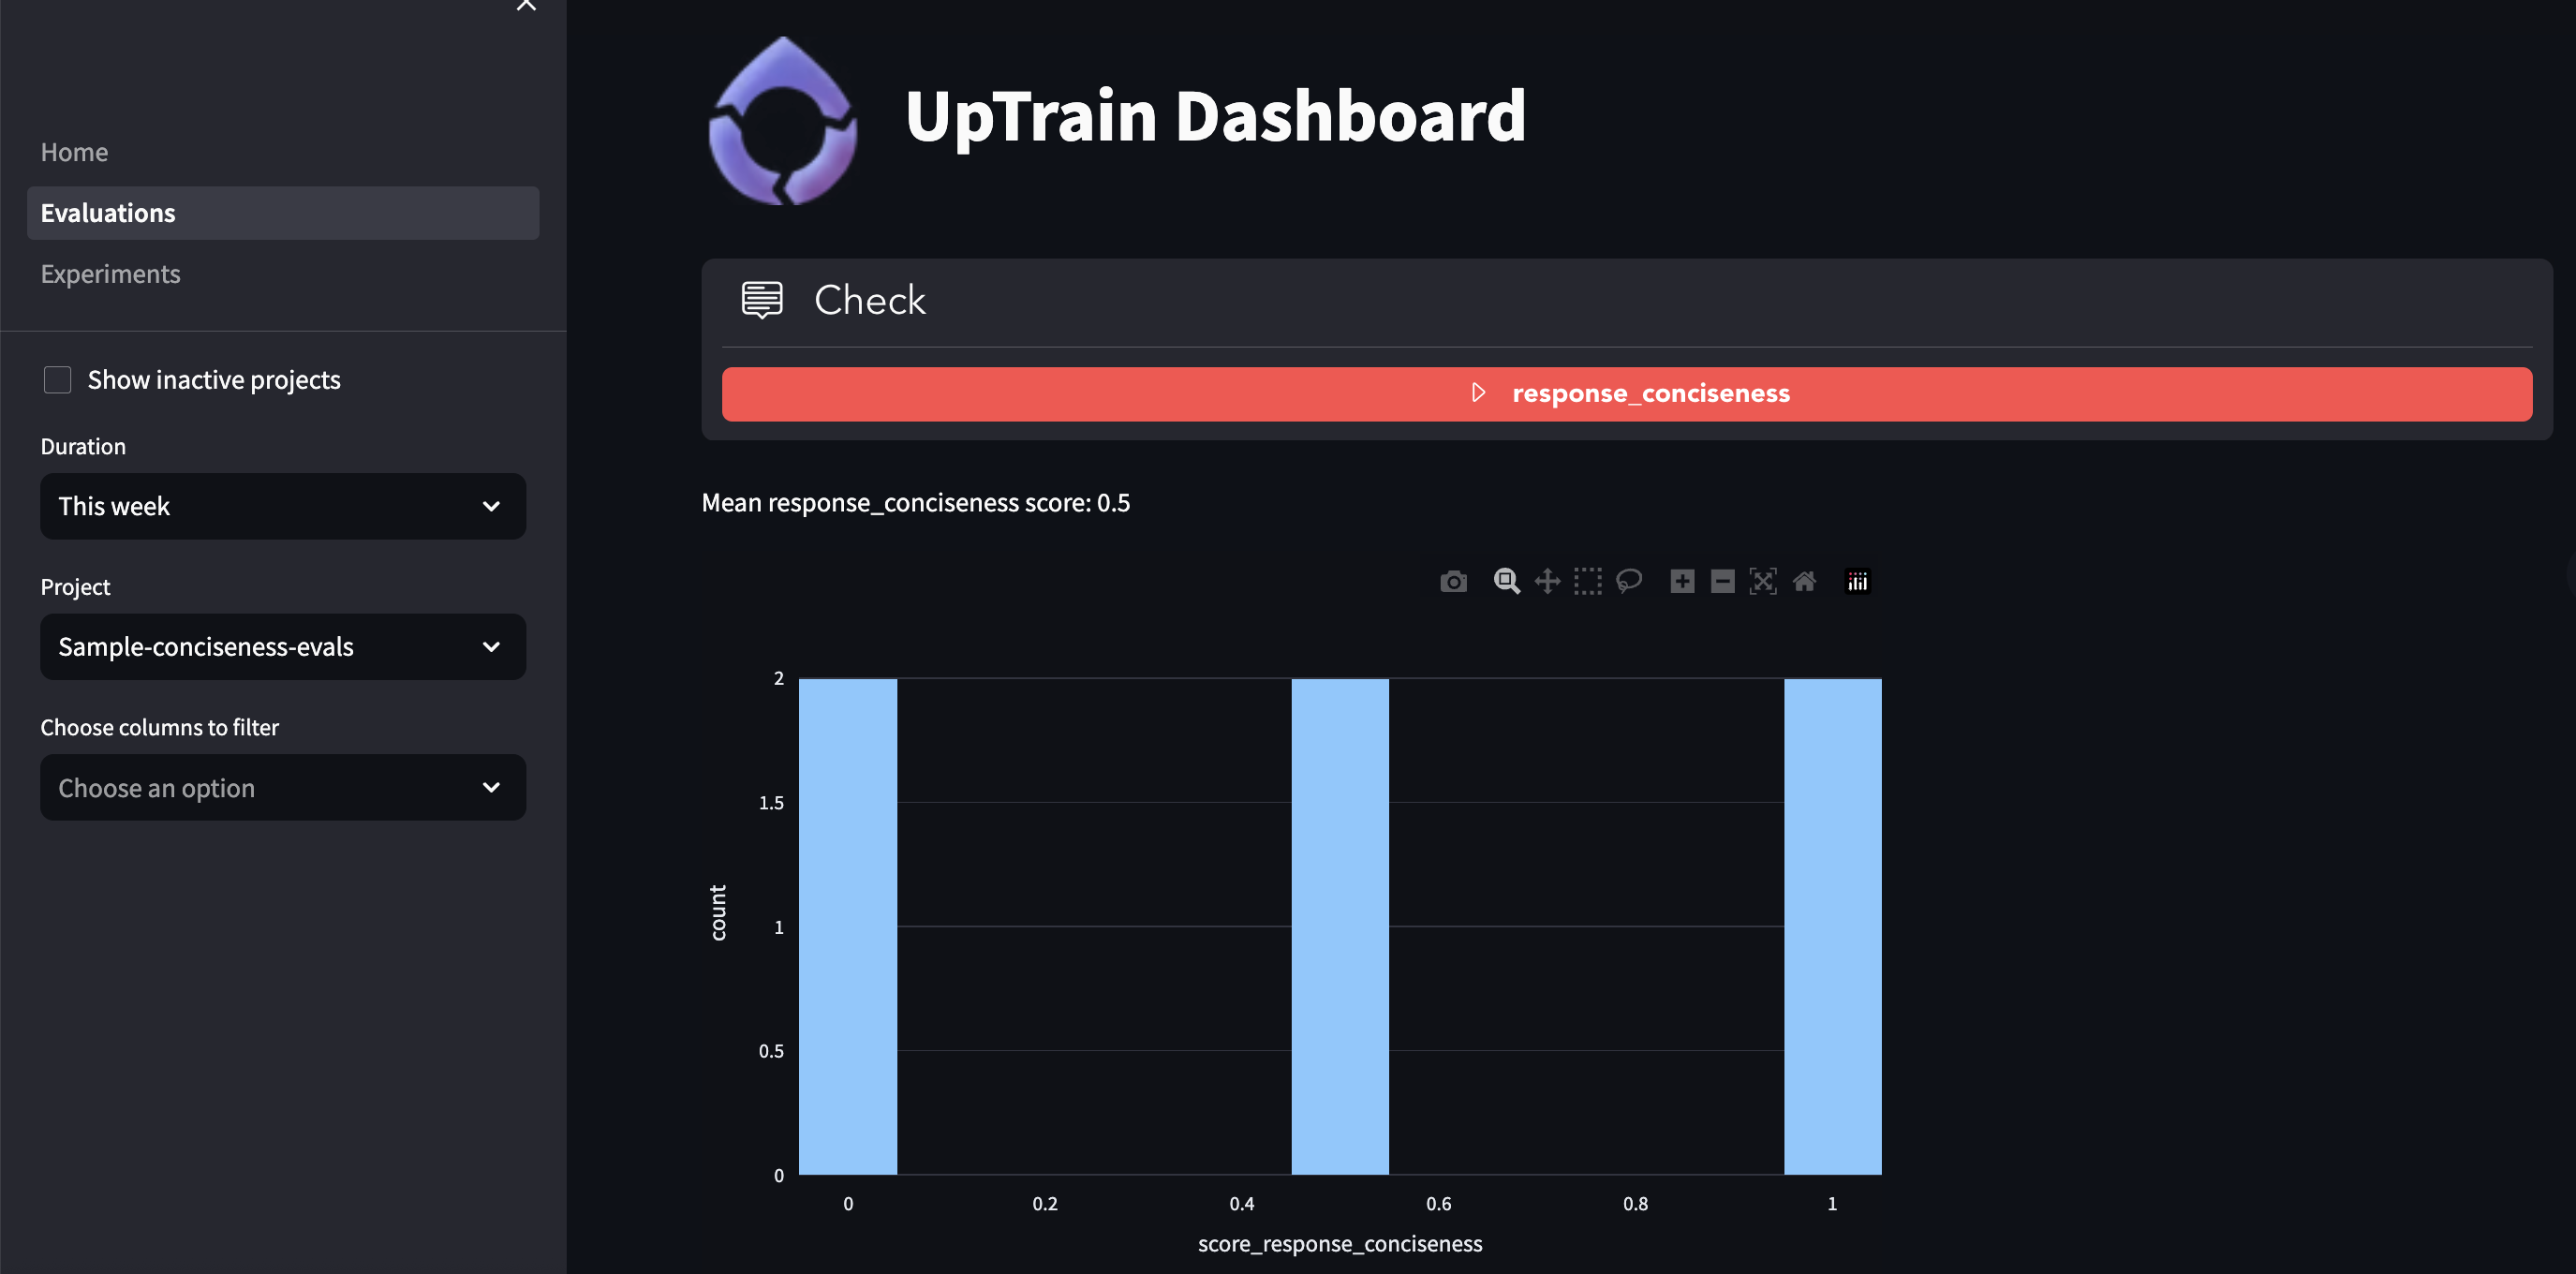

### Insights:
You can filter failure cases and generate common topics among them. This can help identify the core issue and help fix it

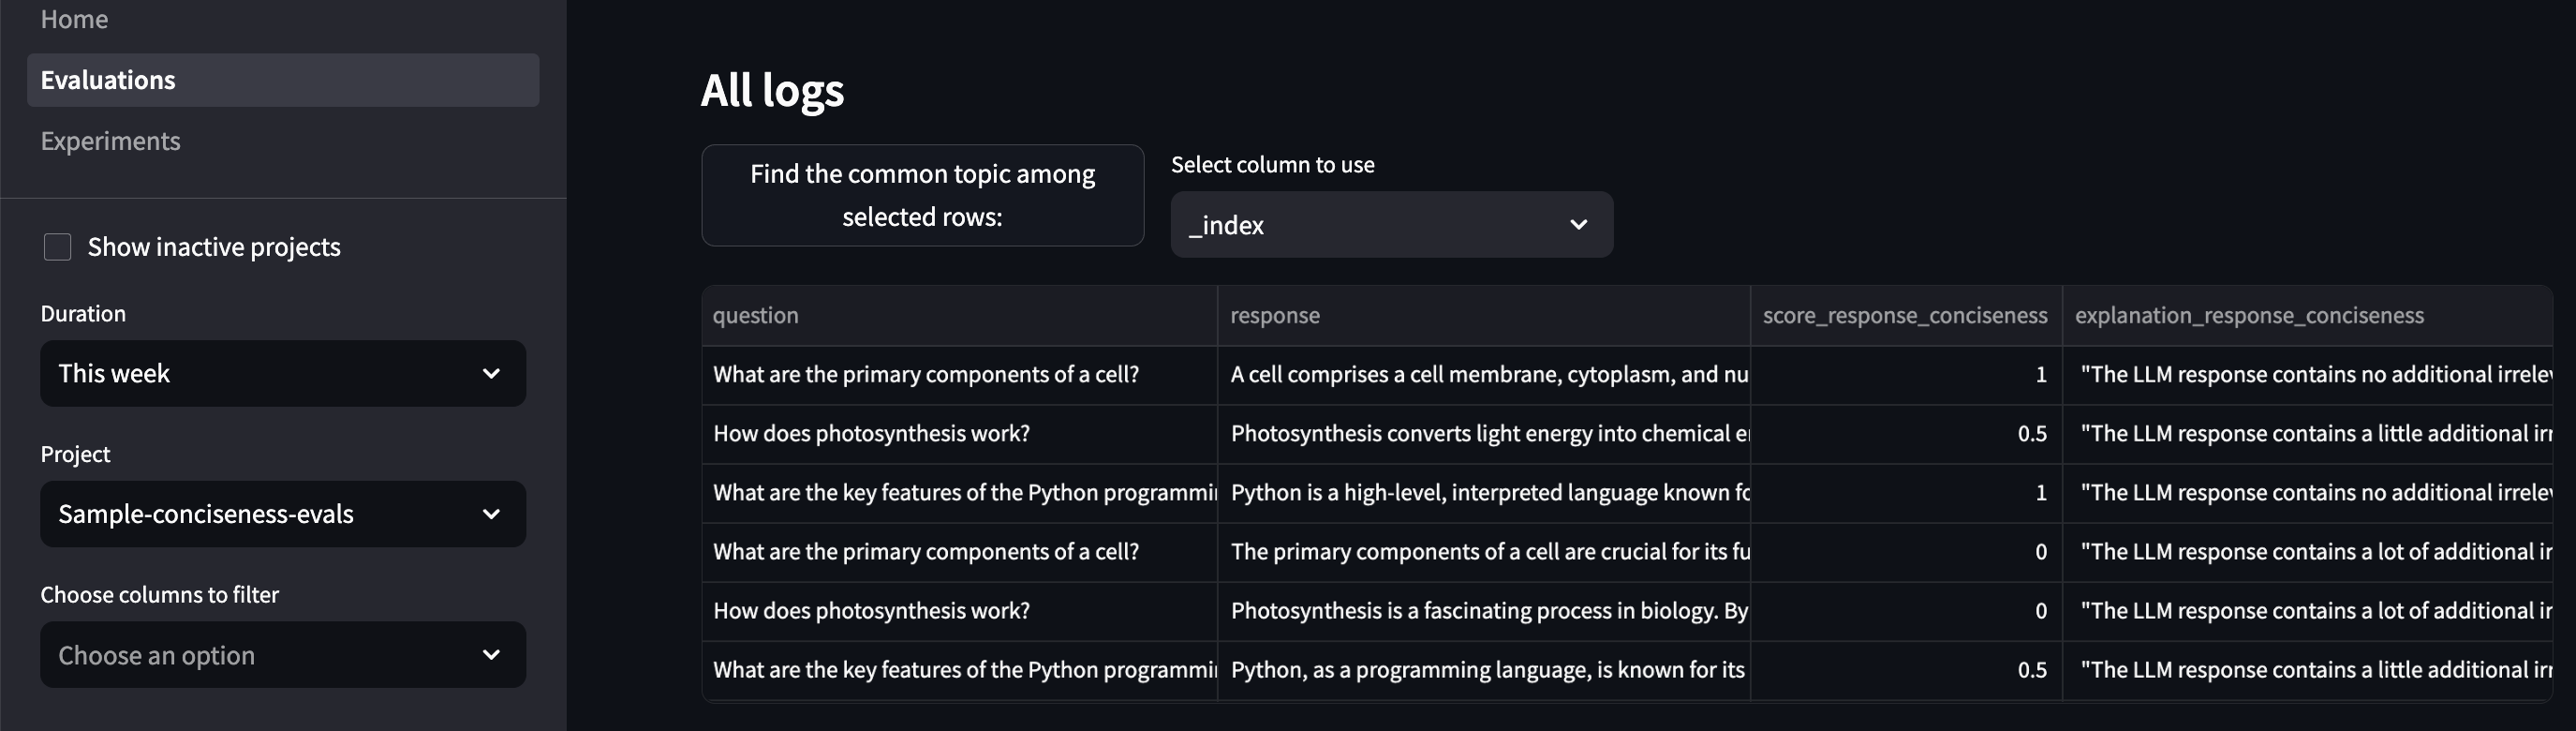